<a href="https://colab.research.google.com/github/sudeeksha03/EDA-obesity-lifestyle/blob/main/07_patterns_outliers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(style="whitegrid")


# 2. Load dataset from files upload

In [3]:
from google.colab import files

uploaded = files.upload()

# Assuming single file upload
for filename in uploaded.keys():
    data = pd.read_csv(filename)
    print(f"Loaded {filename} successfully.")

data.head()


Saving Obesity prediction.csv to Obesity prediction.csv
Loaded Obesity prediction.csv successfully.


,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# 3. Visualizing relationships (Patterns)

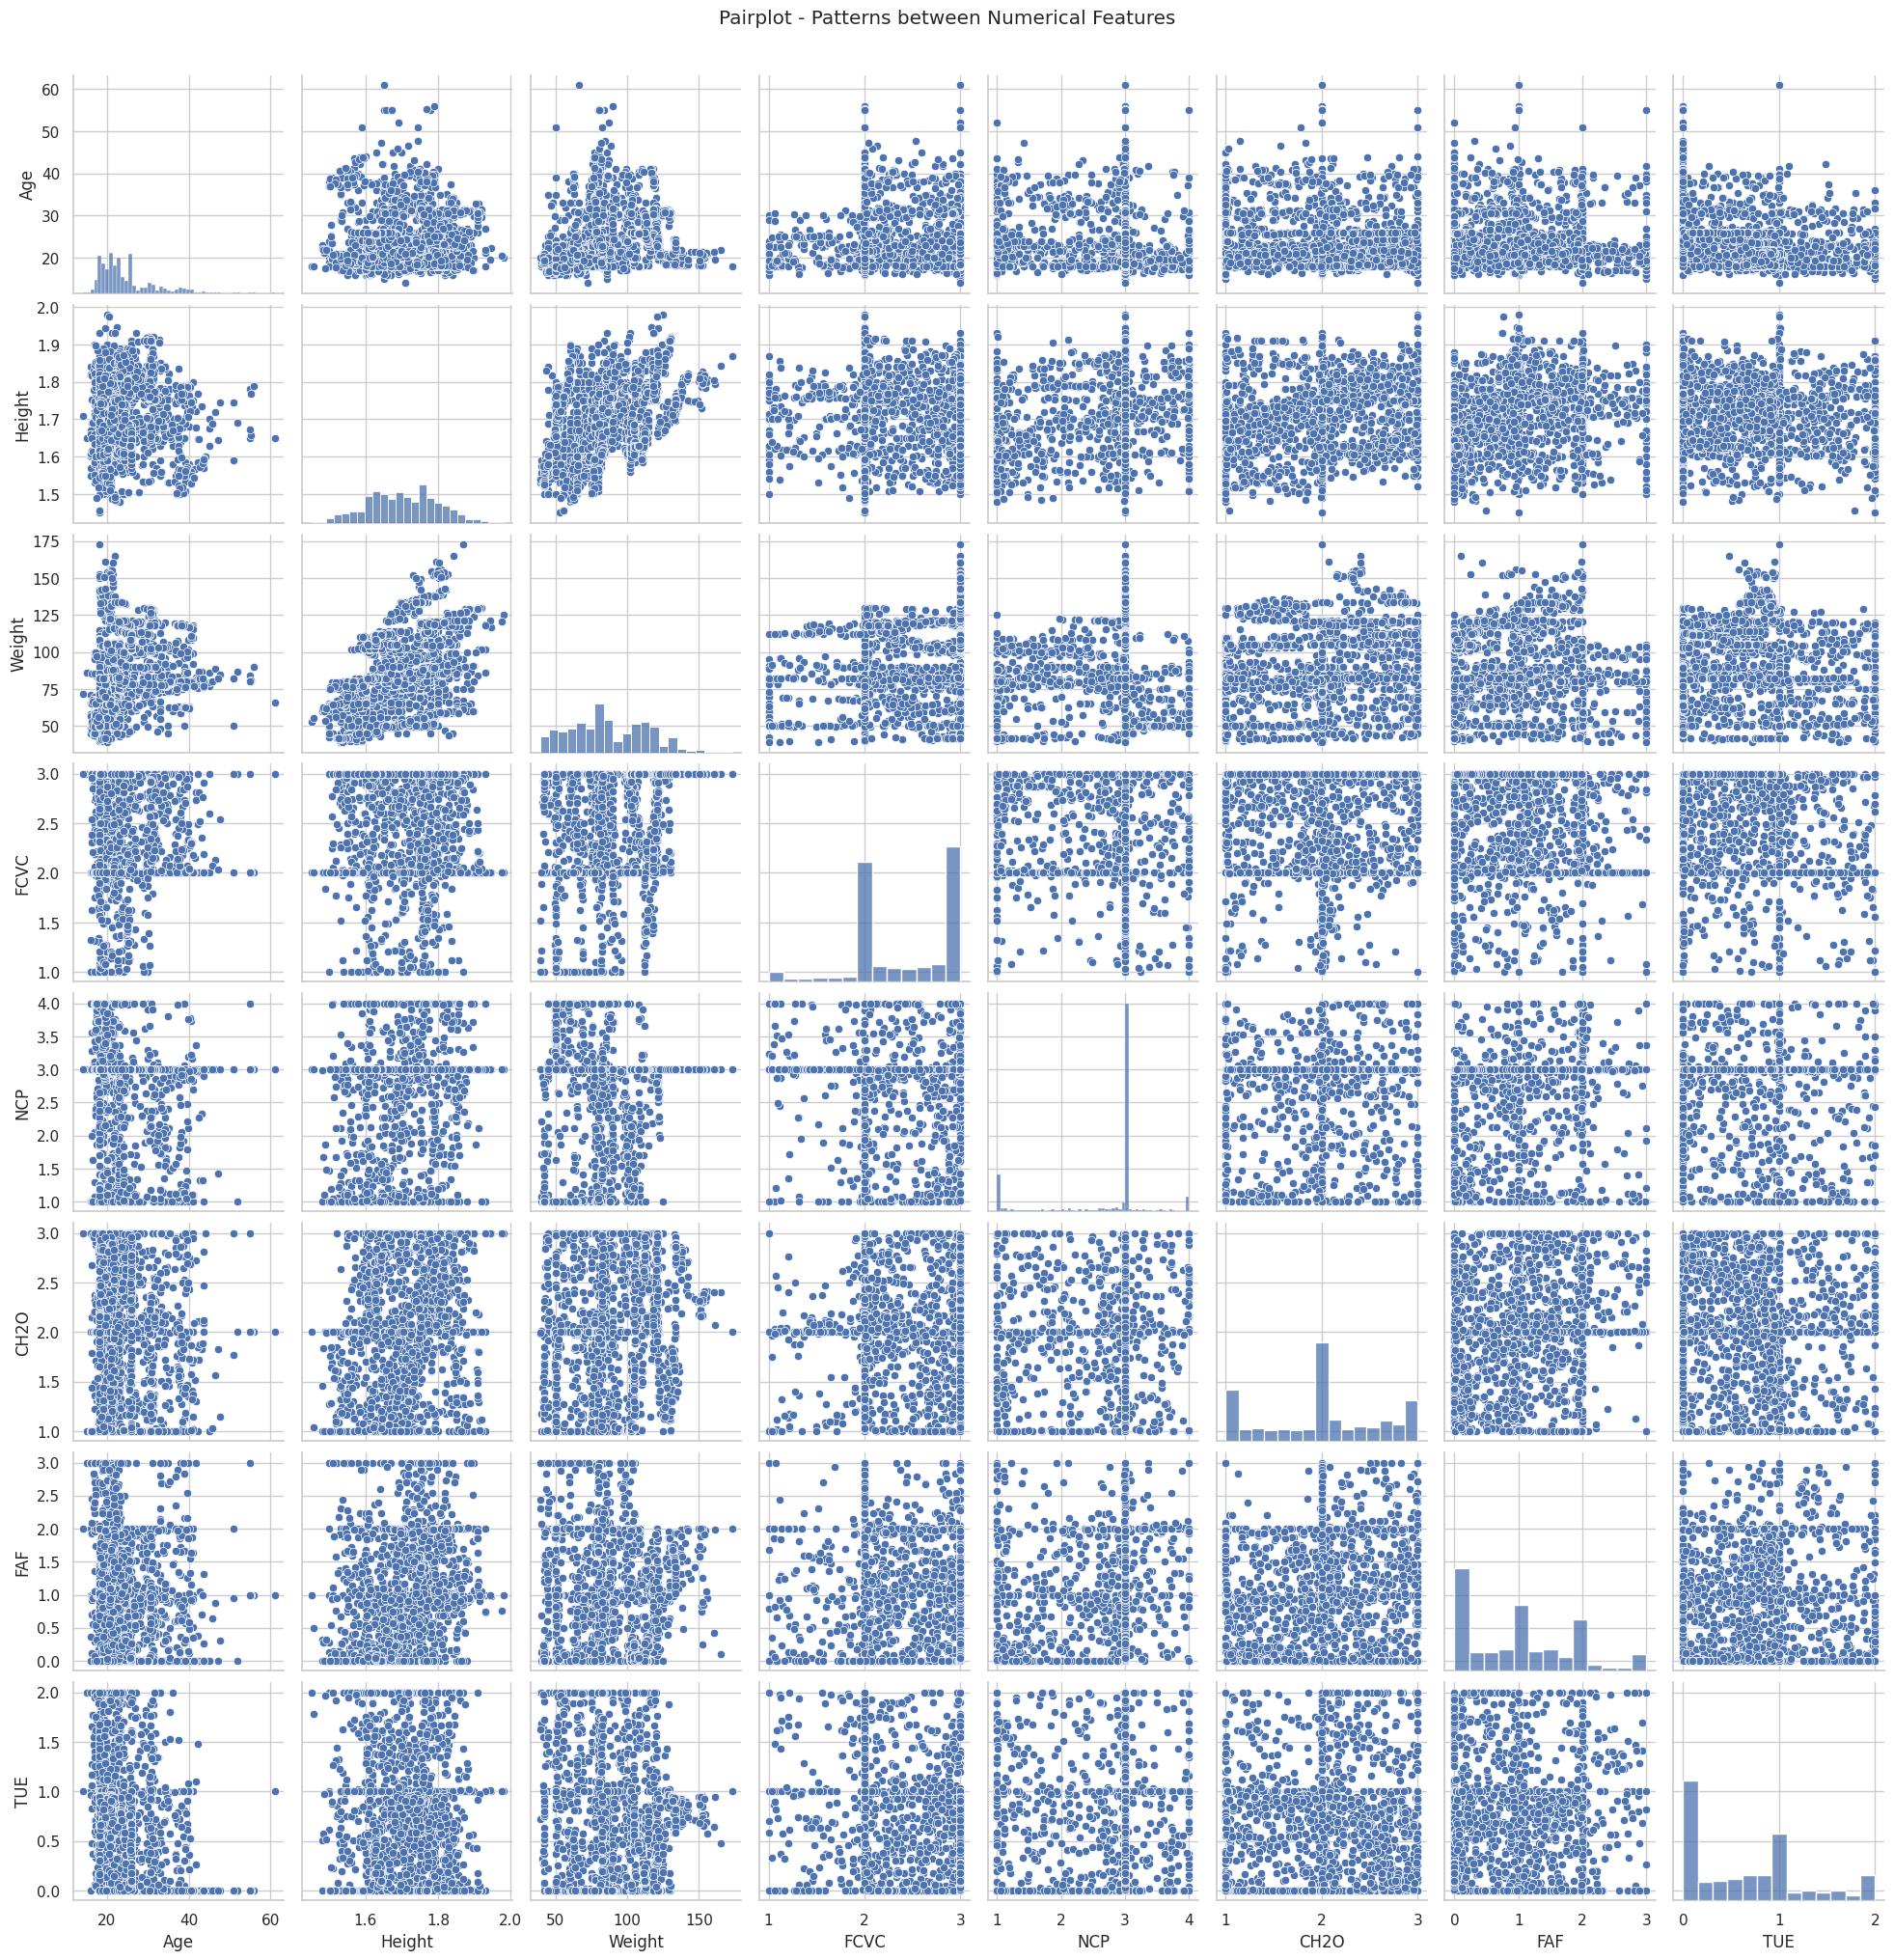

In [4]:
num_cols = data.select_dtypes(include=np.number).columns

# Pairplot (can be heavy for large datasets)
sns.pairplot(data[num_cols])
plt.suptitle("Pairplot - Patterns between Numerical Features", y=1.02)
plt.show()


# 4. Heatmap of correlation to observe strong patterns


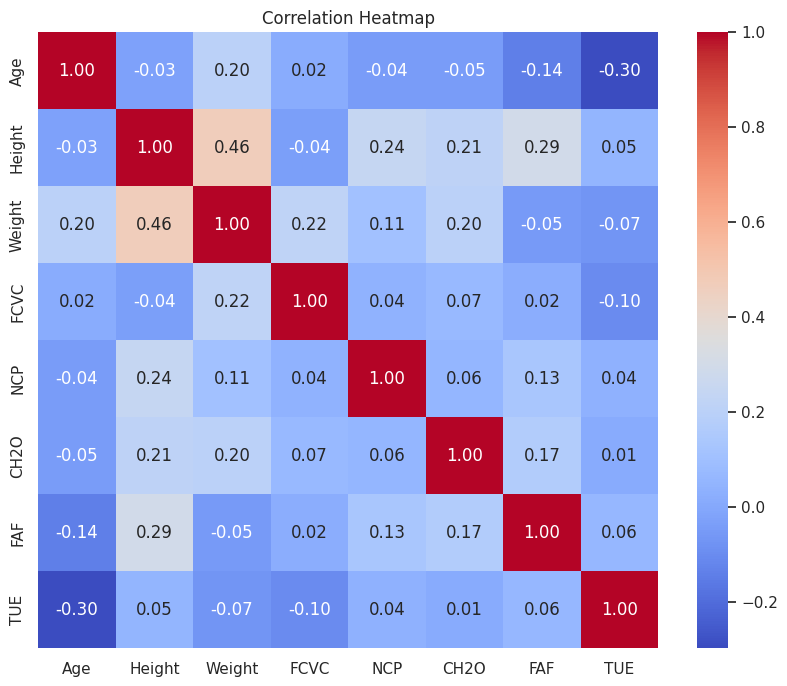

In [5]:
plt.figure(figsize=(10,8))
corr = data[num_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


# 5. Outlier Detection using Boxplots

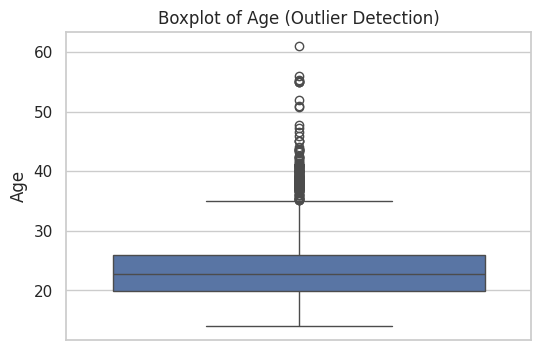

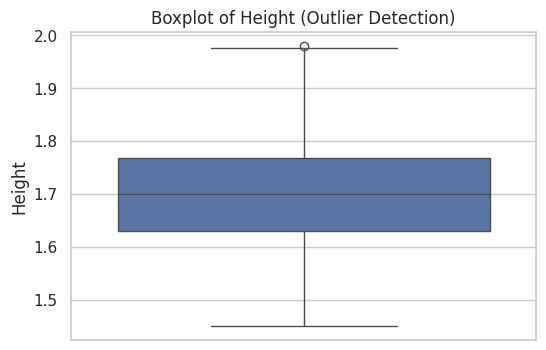

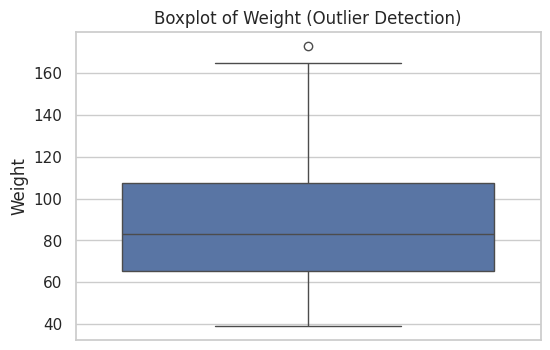

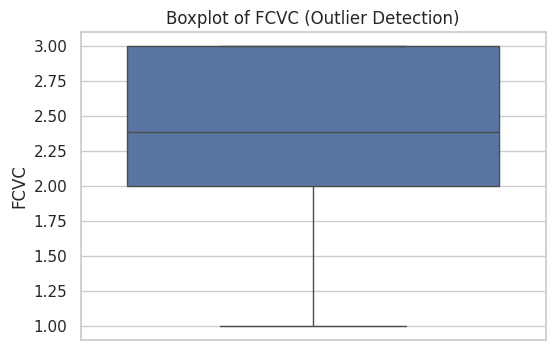

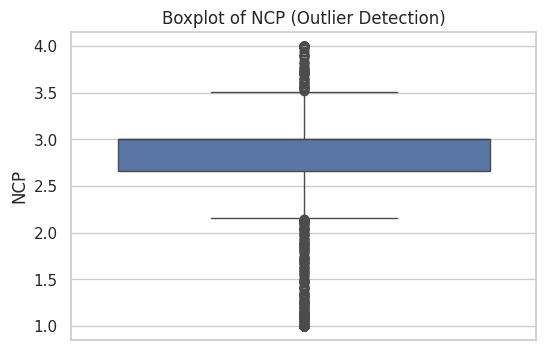

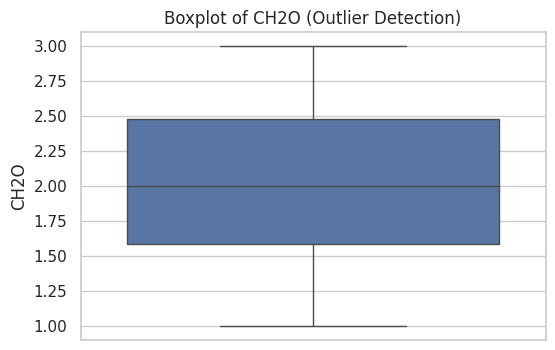

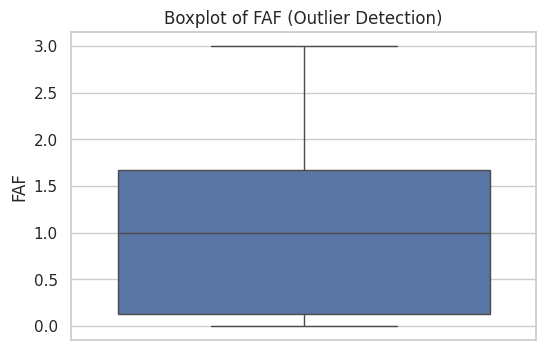

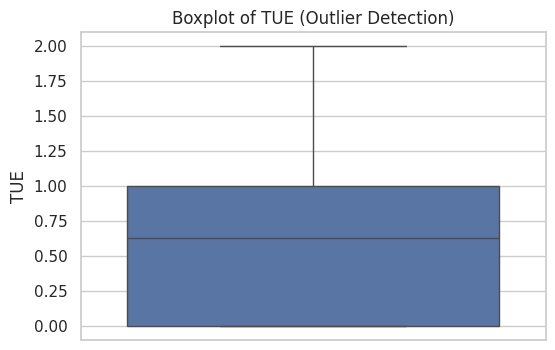

In [7]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=data[col])
    plt.title(f"Boxplot of {col} (Outlier Detection)")
    plt.show()


# 6. Outlier Detection using IQR method

In [8]:
print("Outlier Detection (IQR Method):\n")
for col in num_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f"{col}: {outliers.shape[0]} outliers")


Outlier Detection (IQR Method):

Age: 168 outliers
Height: 1 outliers
Weight: 1 outliers
FCVC: 0 outliers
NCP: 579 outliers
CH2O: 0 outliers
FAF: 0 outliers
TUE: 0 outliers


# 8. Visualizing categorical patterns using countplots

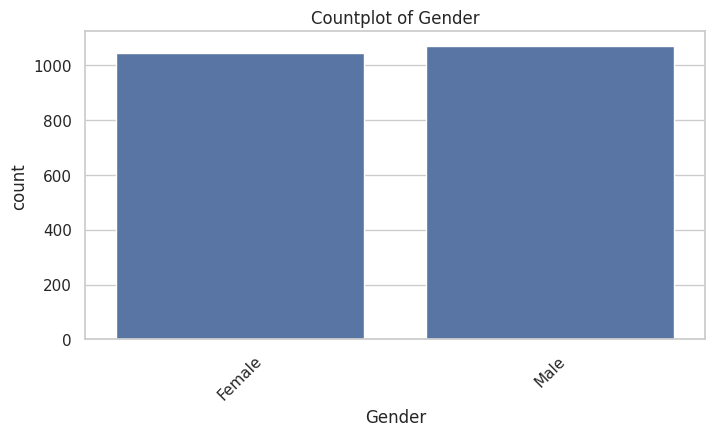

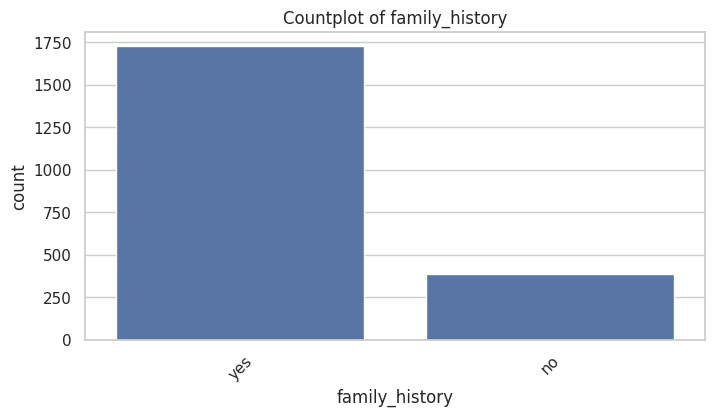

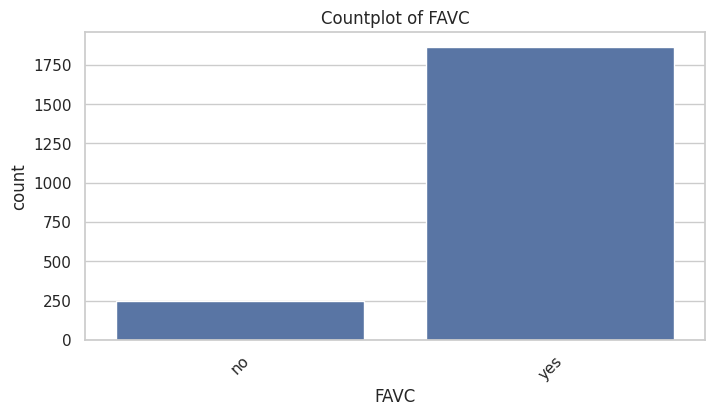

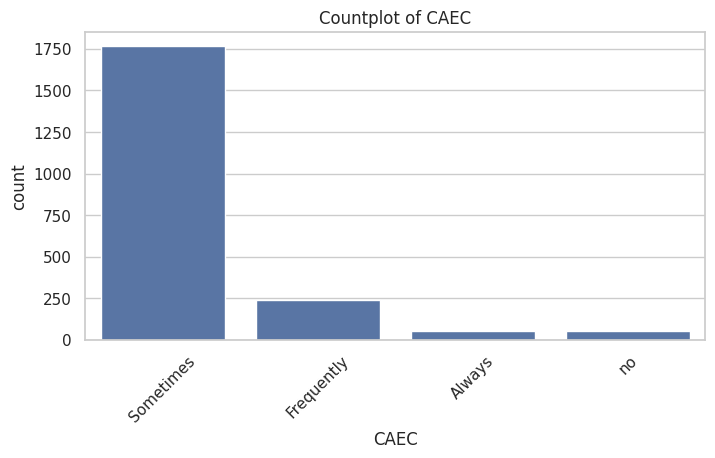

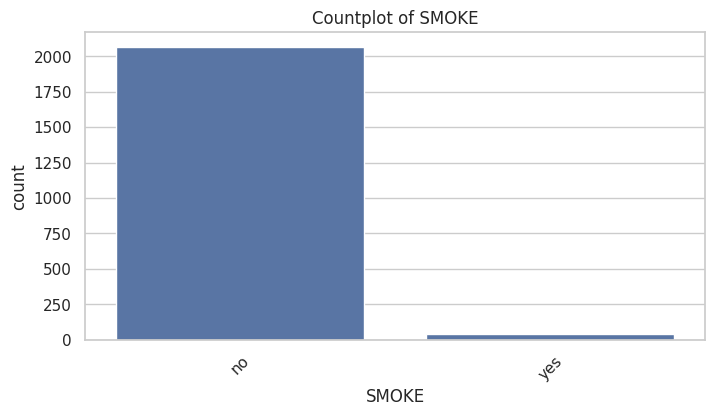

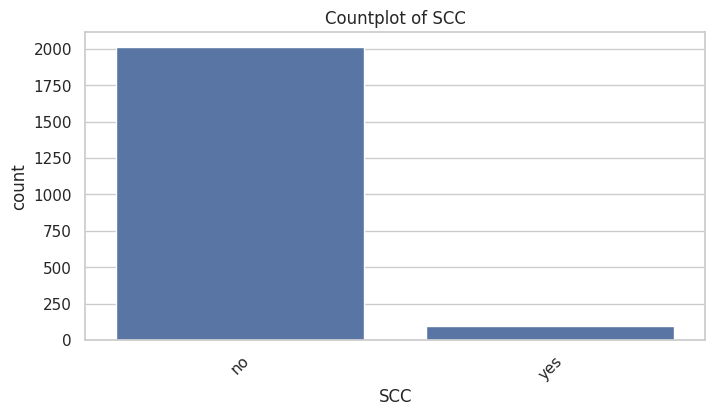

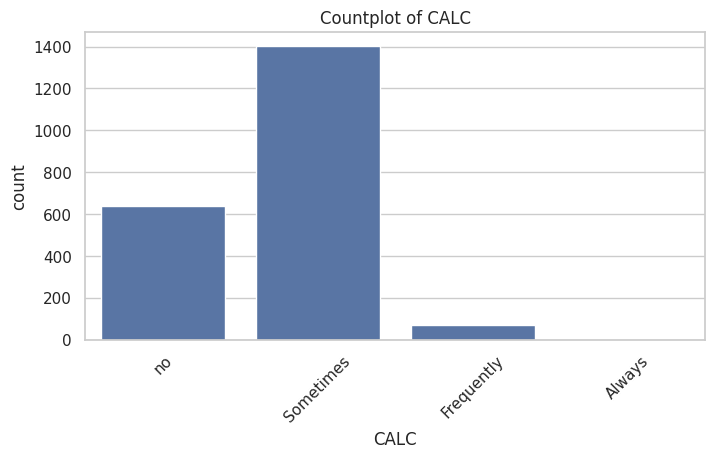

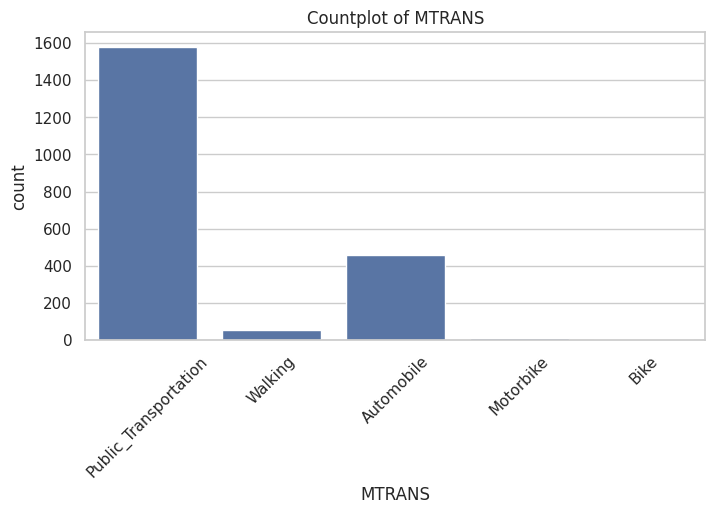

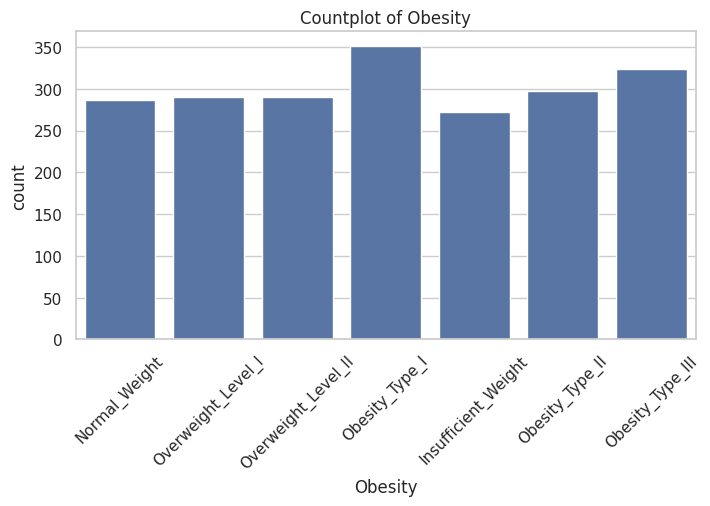

In [10]:
cat_cols = data.select_dtypes(include=['object']).columns

for col in cat_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(x=col, data=data)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()
